# Text Classification with Machine Learning
Homework #8

Brendan Lim

In [68]:
import pandas as pd

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import classification_report

## Clickbait Dataset
This clickbait dataset is comprised of two files exclusively containing 16,000 clickbait and regular headlines each. The clickbait headlines were scraped from sites such as Buzzfeed or Scoopwhoop. Non-clickbait headlines were gathered from sites like the New York Times or the Guardian.

The trained model just has to do binary classification between clickbait or not.

### Citation and Link:
Abhijnan Chakraborty, Bhargavi Paranjape, Sourya Kakarla, and Niloy Ganguly. "Stop Clickbait: Detecting and Preventing Clickbaits in Online News Media”. In Proceedings of the 2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM), San Fransisco[sic], US, August 2016.

https://github.com/bhargaviparanjape/clickbait

In [69]:
#importing the data
data_path = "./dataset/"

clickbait_headlines = []
with open(data_path + "clickbait_data", 'r', encoding='utf-8') as f_handle:
   for line in f_handle:
      if not line.isspace():
         clickbait_headlines.append(line.rstrip())

non_clickbait = []
with open(data_path + "non_clickbait_data", 'r', encoding='utf-8') as f_handle:
   for line in f_handle:
      if not line.isspace():
         non_clickbait.append(line.rstrip())

print(len(clickbait_headlines))
print(len(non_clickbait))

print(clickbait_headlines[0])
print(non_clickbait[0])

15999
16001
Should I Get Bings
Bill Changing Credit Card Rules Is Sent to Obama With Gun Measure Included


In [70]:
#formatting data into a pandas dataframe
clickbait_df = pd.DataFrame(clickbait_headlines)
clickbait_df['clickbait'] = 1

non_clickbait_df = pd.DataFrame(non_clickbait)
non_clickbait_df['clickbait'] = 0


clickbait_df.append(non_clickbait_df)
df = pd.concat([clickbait_df, non_clickbait_df], axis=0)
df.columns = ["Headline", "clickbait"]

display(df)

C:\Users\blim5\AppData\Local\Temp\ipykernel_30624\2439330956.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clickbait_df.append(non_clickbait_df)


,Headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


### Visualization of Dataset Distribution

<AxesSubplot:>

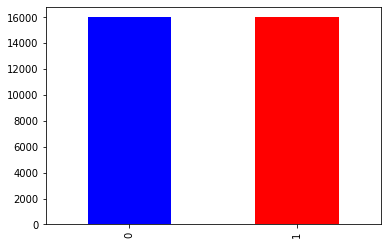

In [90]:
#wow
df['clickbait'].value_counts().plot(kind='bar', color = ['b', 'r'])

In [91]:
#going to use the same split for all model types
x_train, x_test, y_train, y_test = train_test_split(df.Headline, df.clickbait, test_size=0.2, train_size=0.8, random_state=1111)

print(x_train.shape)
print(x_test.shape)

(25600,)
(6400,)


In [72]:
#preprocessing words into a bag of words model
sw = set(stopwords.words('english'))
vect = TfidfVectorizer(stop_words=sw)

V_train = vect.fit_transform(x_train)
V_test = vect.transform(x_test)

print(V_train.shape)
print(V_test.shape)

(25600, 20431)
(6400, 20431)


## Naive Bayes

In [73]:
#training the model
nb = MultinomialNB()
nb.fit(V_train, y_train)

nb_pred = nb.predict(V_test)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3149
           1       0.96      0.97      0.96      3251

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



## Logistic Regression

In [74]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
lr.fit(V_train, y_train)

lr_pred = lr.predict(V_test)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3149
           1       0.97      0.93      0.95      3251

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400



## Neural Network

In [77]:
nn = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes=(30,2), random_state=1111)

nn.fit(V_train, y_train)
nn_pred = nn.predict(V_test)

print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3149
           1       0.00      0.00      0.00      3251

    accuracy                           0.49      6400
   macro avg       0.25      0.50      0.33      6400
weighted avg       0.24      0.49      0.32      6400



C:\Users\blim5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blim5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blim5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

### Grid Search
Grid Search is an ML methodology where you run each permutation of model given a range of hyperparameters to find the best model hyperparameters.

In [81]:
from sklearn.model_selection import GridSearchCV

nn = MLPClassifier(solver='lbfgs')
# check each 
params = {
    'hidden_layer_sizes' : [(x,2) for x in range(10,100,10)],
    'activation' : ['logistic', 'tanh', 'relu']
}
gridsearch = GridSearchCV(nn, param_grid=params, n_jobs=-1, cv = 5)
gridsearch.fit(V_test, y_test)

GridSearchCV(cv=5, estimator=MLPClassifier(solver='lbfgs'), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 2), (20, 2), (30, 2),
                                                (40, 2), (50, 2), (60, 2),
                                                (70, 2), (80, 2), (90, 2)]})

In [82]:
print(gridsearch.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (30, 2)}


In [86]:
gs_pred = gridsearch.predict(V_train)

print(classification_report(y_train,gs_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     12852
           1       0.90      0.97      0.93     12748

    accuracy                           0.93     25600
   macro avg       0.93      0.93      0.93     25600
weighted avg       0.93      0.93      0.93     25600

